In [1]:
# fundamentals
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.metrics import confusion_matrix

#  printing of number without scientific notation
np.set_printoptions(precision=3,suppress=True)

In [ ]:
df_sc = pd.read_csv('../data/processed_sensor_community.csv').drop('Unnamed: 0', axis=1)
df_sc['timestamp'] = pd.to_datetime(df_sc.timestamp)
df_sc['date'] = pd.to_datetime(df_sc.date)

In [4]:
display(df_sc.head(10))

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
0,0,2020-01-01,50.042000,8.436000,2020-01-01,212.110833,140.574167,24.278724,16.827501,NaN,2.700000,96.000000,NaN,NaN,NaN,Frankfurt
1,0,2020-01-01,50.046000,8.852000,2020-01-01,627.256000,311.089200,62.521844,41.972714,NaN,-0.536000,98.892000,NaN,0.111355,0.351094,Frankfurt
2,0,2020-01-01,50.055659,8.692377,2020-01-01,305.763333,203.632500,114.922437,81.541566,NaN,-0.108333,99.900000,NaN,0.210417,0.000000,Frankfurt
3,0,2020-01-01,50.056000,8.506000,2020-01-01,177.833333,86.575000,32.063441,18.312198,NaN,NaN,NaN,NaN,NaN,NaN,Frankfurt
4,0,2020-01-01,50.058000,8.688000,2020-01-01,96.024167,51.565833,60.892413,31.903331,102132.965833,6.958333,53.087500,10.008531,0.067545,0.416280,Frankfurt
5,0,2020-01-01,50.070000,8.436000,2020-01-01,182.384400,148.212000,26.140829,21.994945,NaN,1.432000,93.352000,NaN,0.124900,0.345350,Frankfurt
6,0,2020-01-01,50.074000,8.436000,2020-01-01,162.614400,124.803200,7.260113,5.791964,NaN,2.287500,48.389583,NaN,0.473837,49.929897,Frankfurt
7,0,2020-01-01,50.074000,8.488000,2020-01-01,343.689167,218.007083,48.023585,35.257436,NaN,1.775000,99.900000,NaN,0.306807,0.000000,Frankfurt
8,0,2020-01-01,50.076000,8.660000,2020-01-01,552.375417,281.740000,162.124160,92.353004,NaN,0.900000,58.932000,NaN,0.282843,2.737353,Frankfurt
9,0,2020-01-01,50.076000,8.868000,2020-01-01,550.325000,326.692500,31.780125,27.827868,NaN,NaN,NaN,NaN,NaN,NaN,Frankfurt


In [5]:
df_sc.shape

(1872419, 16)

In [6]:
df_sc.sort_values('timestamp', inplace=True)

In [7]:
display(df_sc.info())
display(df_sc.loc[:,['pressure', 'temperature', 'humidity', 'PM10', 'PM2p5']].describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872419 entries, 0 to 1872418
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   hour             int64         
 1   date             datetime64[ns]
 2   lat              float64       
 3   lon              float64       
 4   timestamp        datetime64[ns]
 5   PM10             float64       
 6   PM2p5            float64       
 7   PM10_std         float64       
 8   PM2p5_std        float64       
 9   pressure         float64       
 10  temperature      float64       
 11  humidity         float64       
 12  pressure_std     float64       
 13  temperature_std  float64       
 14  humidity_std     float64       
 15  city             object        
dtypes: datetime64[ns](2), float64(12), int64(1), object(1)
memory usage: 242.9+ MB


None

,count,mean,std,min,25%,50%,75%,max
pressure,366039.0,99734.563922,17078.993859,951.015385,99874.167813,100638.389655,101455.600000,6.437391e+06
temperature,1571687.0,12.238369,53.894040,-3276.600000,6.820833,12.229167,19.095000,1.959636e+02
humidity,1559298.0,79.774832,26.862098,0.000000,63.233333,95.505882,99.900000,2.094545e+03
PM10,1872408.0,28.059194,162.742950,0.000000,4.190952,8.142500,16.140421,1.999900e+03
PM2p5,1872405.0,14.979465,84.485208,0.000000,1.924167,4.074583,9.200833,9.999000e+02


In [9]:
pressure_count = df_sc[df_sc['pressure'] > 0].pressure.count()
total = df_sc.shape[0]
pressure_NaN = total - pressure_count

temperature_count = df_sc[df_sc['temperature'] > 0].temperature.count()
total = df_sc.shape[0]
temperature_NaN = total - temperature_count

humidity_count = df_sc[df_sc['humidity'] > 0].humidity.count()
total = df_sc.shape[0]
humidity_NaN = total - humidity_count

print('                              missing values')
print('pressure         ', pressure_NaN , '    ', round(pressure_NaN / total * 100,2), '%')
print('temperature     ', temperature_NaN , '    ', round(temperature_NaN / total * 100,2), '%')
print('humidity            ', humidity_NaN , '    ', round(humidity_NaN / total * 100,2), '%')

                              missing values
pressure          1506380      80.45 %
temperature      332954      17.78 %
humidity             313424      16.74 %


In [10]:
df_sc.query("lat==53.094000 and lon==8.800000")

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
88,0,2020-01-01,53.094,8.8,2020-01-01 00:00:00,603.574400,416.924800,101.592197,81.169325,103360.840000,2.358800,100.0,9.040096,0.143884,0.0,Bremen
76583,1,2020-01-01,53.094,8.8,2020-01-01 01:00:00,371.845833,223.328750,115.649053,86.018717,103328.291667,2.079167,100.0,7.607086,0.086322,0.0,Bremen
152584,2,2020-01-01,53.094,8.8,2020-01-01 02:00:00,286.286400,144.027200,47.196824,15.194897,103301.080000,1.704000,100.0,13.981893,0.196511,0.0,Bremen
228004,3,2020-01-01,53.094,8.8,2020-01-01 03:00:00,398.416667,120.210833,144.803565,21.431496,103304.625000,0.917083,100.0,6.452586,0.387528,0.0,Bremen
303888,4,2020-01-01,53.094,8.8,2020-01-01 04:00:00,210.317500,84.188750,47.001256,9.150113,103285.375000,-0.470417,100.0,5.829554,0.313070,0.0,Bremen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559674,19,2022-02-28,53.094,8.8,2022-02-28 19:00:00,33.631667,18.187083,3.796269,1.193346,103144.445000,4.675000,100.0,4.472472,0.349111,0.0,Bremen
1638552,20,2022-02-28,53.094,8.8,2022-02-28 20:00:00,37.732500,18.972500,25.247513,9.782266,103141.417083,3.611250,100.0,5.955964,0.289997,0.0,Bremen
1717260,21,2022-02-28,53.094,8.8,2022-02-28 21:00:00,35.311250,18.632500,8.636903,4.232735,103114.962500,2.888333,100.0,11.922473,0.158763,0.0,Bremen
1795133,22,2022-02-28,53.094,8.8,2022-02-28 22:00:00,32.098333,17.451667,3.655138,1.470530,103072.369167,2.619167,100.0,14.756146,0.045960,0.0,Bremen


(18262.0, 18293.0)

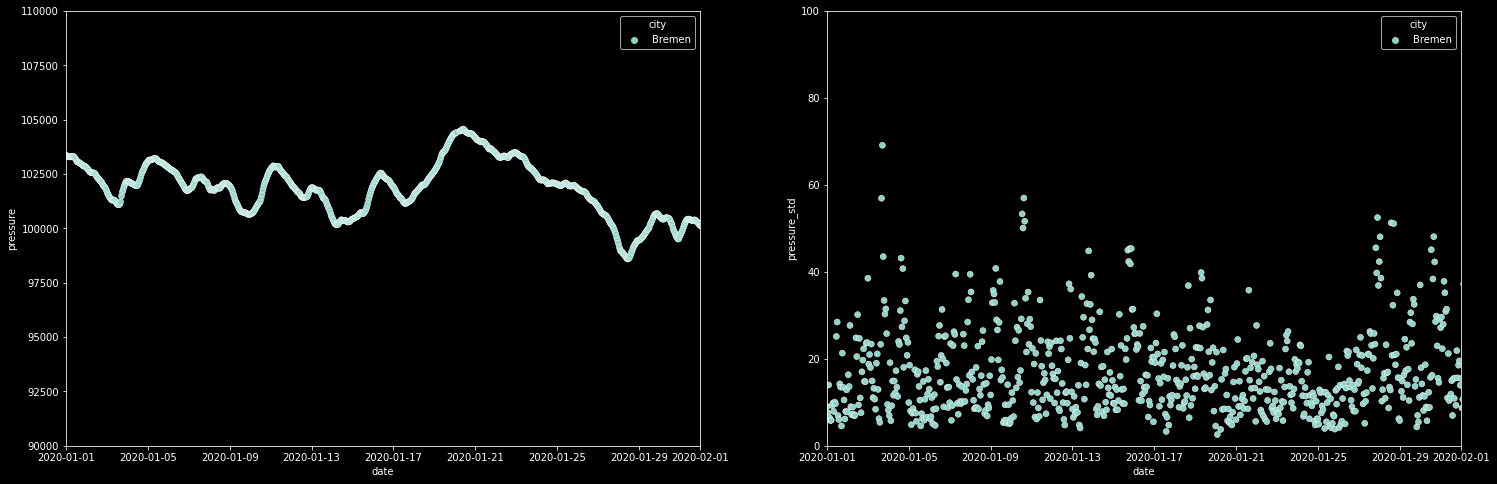

In [11]:
# plot pressure for one sensors
plt.figure(figsize=(25, 8))
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2020-02-01')

plt.subplot(1,2,1)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='pressure', hue='city')
plt.xlabel('date')
plt.ylim(90000,110000)
plt.xlim(start, end)

plt.subplot(1,2,2)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='pressure_std', hue='city')
plt.xlabel('date')
plt.ylim(0,100)
plt.xlim(start, end)

(18414.0, 18444.0)

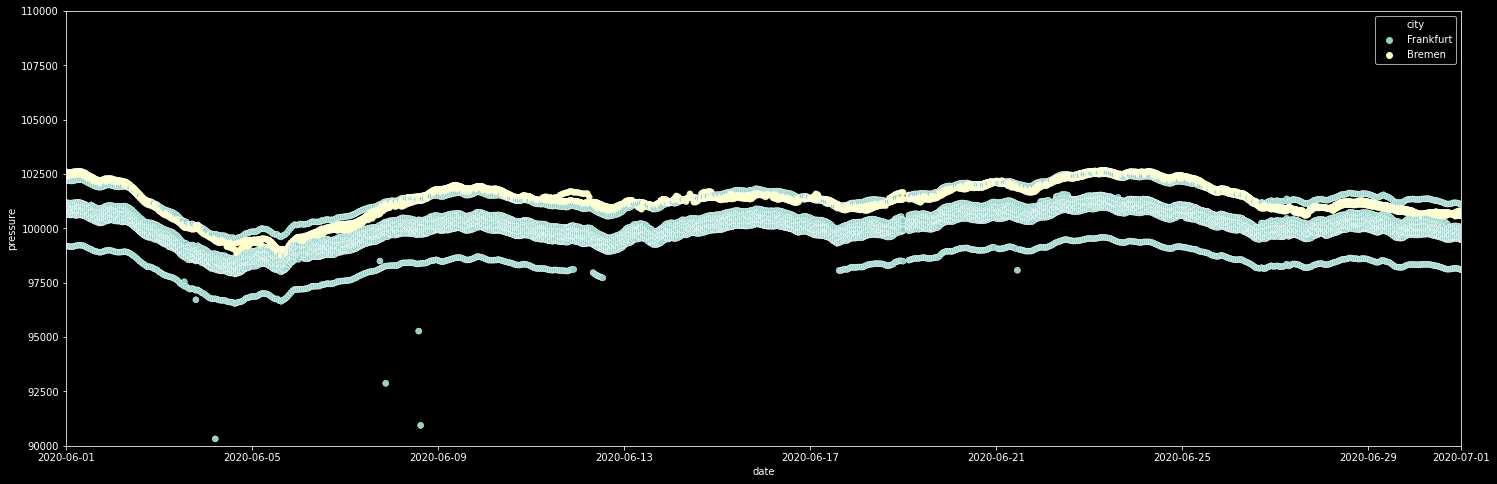

In [12]:
# plot pressure o all sensors
start = pd.to_datetime('2020-06-01')
end = pd.to_datetime('2020-07-01')
plt.figure(figsize=(25, 8))

sns.scatterplot(data=df_sc, x='timestamp', y='pressure', hue='city')
plt.xlabel('date')
plt.ylim(90000,110000)
plt.xlim(start, end)

In [ ]:
# plot pressure o all sensors
start = pd.to_datetime('2020-09-01')
end = pd.to_datetime('2020-12-01')
plt.figure(figsize=(25, 8))

sns.scatterplot(data=df_sc, x='timestamp', y='pressure', hue='city')
plt.xlabel('date')
plt.ylim(950,1050)
plt.xlim(start, end)

In [36]:
print("sensors measuring pressure obviously below mean")
display(df_sc.query("date=='2021-02-01' and pressure<975").groupby(['lat', 'lon'])['city'].value_counts())
display(df_sc.query("date=='2020-07-01' and pressure<985").groupby(['lat', 'lon'])['city'].value_counts())
display(df_sc.query("date=='2020-10-02' and pressure<970").groupby(['lat', 'lon'])['city'].value_counts())

print("sensors measuring pressure obviously above mean")
display(df_sc.query("date=='2021-01-16' and pressure>1025 and city=='Frankfurt'").groupby(['lat', 'lon'])['city'].value_counts())
display(df_sc.query("date=='2021-07-01' and pressure>1010 and city=='Frankfurt'").groupby(['lat', 'lon'])['city'].value_counts())
display(df_sc.query("date=='2020-07-13' and pressure>1020 and city=='Frankfurt'").groupby(['lat', 'lon'])['city'].value_counts())

sensors measuring pressure obviously below mean


lat     lon    city     
50.188  8.524  Frankfurt    24
53.094  8.800  Bremen       20
Name: city, dtype: int64

lat     lon    city     
50.188  8.524  Frankfurt    24
Name: city, dtype: int64

lat     lon    city     
50.188  8.524  Frankfurt    20
Name: city, dtype: int64

sensors measuring pressure obviously above mean


lat     lon    city     
50.138  8.502  Frankfurt    14
Name: city, dtype: int64

lat     lon    city     
50.138  8.502  Frankfurt    24
Name: city, dtype: int64

lat     lon    city     
50.138  8.502  Frankfurt    15
Name: city, dtype: int64

low pressure values
| city | lat | lon | hight (m) |
|---|---|---|---|
| Frankfurt | 50.188 | 8.524 | 260 |
| Bremen | 53.094 | 8.800 | 3 |

high pressure values
| city | lat | lon | hight (m) |
|---|---|---|---|
| Frankfurt | 50.138 | 8.502 | 142 |

mean:
Frankfurt: 112 m
Bremen: 11 m


In [37]:
#sensors close to uncommon low pressure measurement in Frankfurt 50.188 | 8.524
df_sc.query("50.118<lat<50.258 and 8.414<lon<8.634").groupby(['lat', 'lon'])['pressure'].sum()

lat        lon     
50.120000  8.604000    0.000000e+00
50.124000  8.582000    0.000000e+00
           8.616000    0.000000e+00
50.126000  8.450000    0.000000e+00
           8.602000    0.000000e+00
50.128000  8.616000    0.000000e+00
50.130000  8.526000    5.448394e+06
50.132000  8.626000    0.000000e+00
50.134000  8.528000    0.000000e+00
           8.626000    0.000000e+00
50.134582  8.527964    0.000000e+00
50.136000  8.532000    8.206468e+06
50.138000  8.502000    1.819789e+07
50.140000  8.518000    0.000000e+00
50.150000  8.544000    0.000000e+00
           8.568000    0.000000e+00
50.154000  8.628000    5.533366e+06
50.158000  8.626000    0.000000e+00
50.160000  8.618000    5.734977e+05
50.162000  8.548000    0.000000e+00
           8.626000    0.000000e+00
50.168000  8.492000    0.000000e+00
           8.568000    0.000000e+00
50.176000  8.620000    0.000000e+00
50.178000  8.626000    0.000000e+00
50.182000  8.624000    0.000000e+00
50.184136  8.509132    0.000000e+00
50.18600

(18262.0, 19051.0)

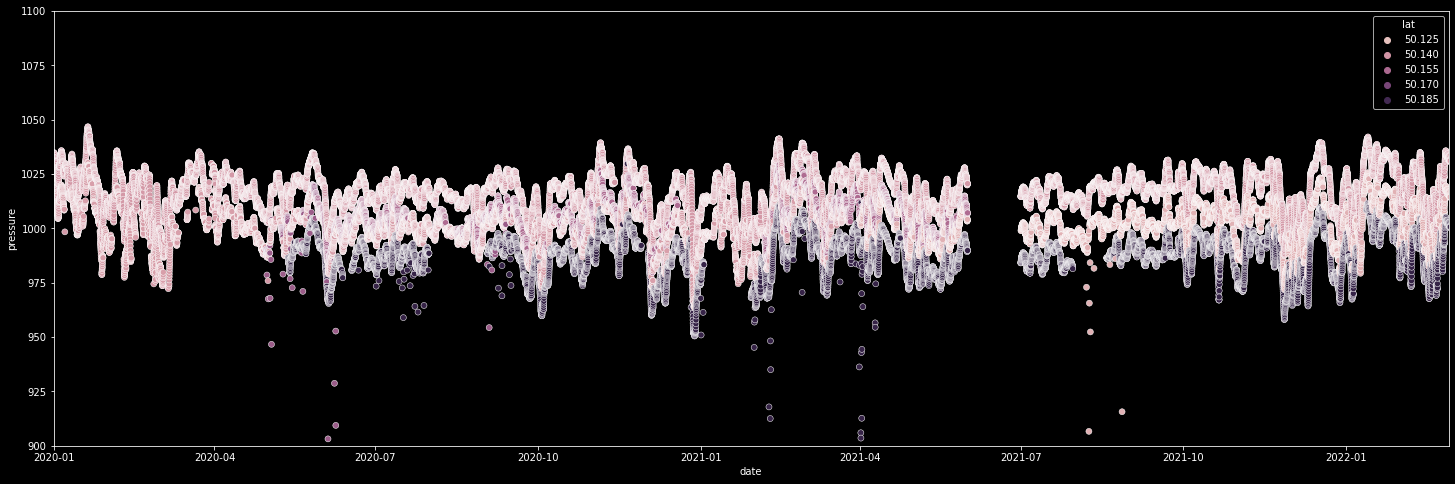

In [38]:
# plot pressure of sensors around unusual low value 50.188 | 8.524
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2022-02-28')
plt.figure(figsize=(25, 8))

sns.scatterplot(data=df_sc.query("50.118<lat<50.258 and 8.414<lon<8.634"), x='timestamp', y='pressure', hue='lat')

plt.xlabel('date')
plt.ylim(900,1100)
plt.xlim(start, end)

In [39]:
#sensors close to uncommon high pressure measurement 50.138 | 8.502
df_sc.query("50.118<lat<50.158 and 8.472<lon<8.532").groupby(['lat', 'lon'])['city'].value_counts()

lat        lon       city     
50.130000  8.526000  Frankfurt     5986
50.134000  8.528000  Frankfurt     4345
50.134582  8.527964  Frankfurt        2
50.138000  8.502000  Frankfurt    18588
50.140000  8.518000  Frankfurt    17954
Name: city, dtype: int64

(18262.0, 19051.0)

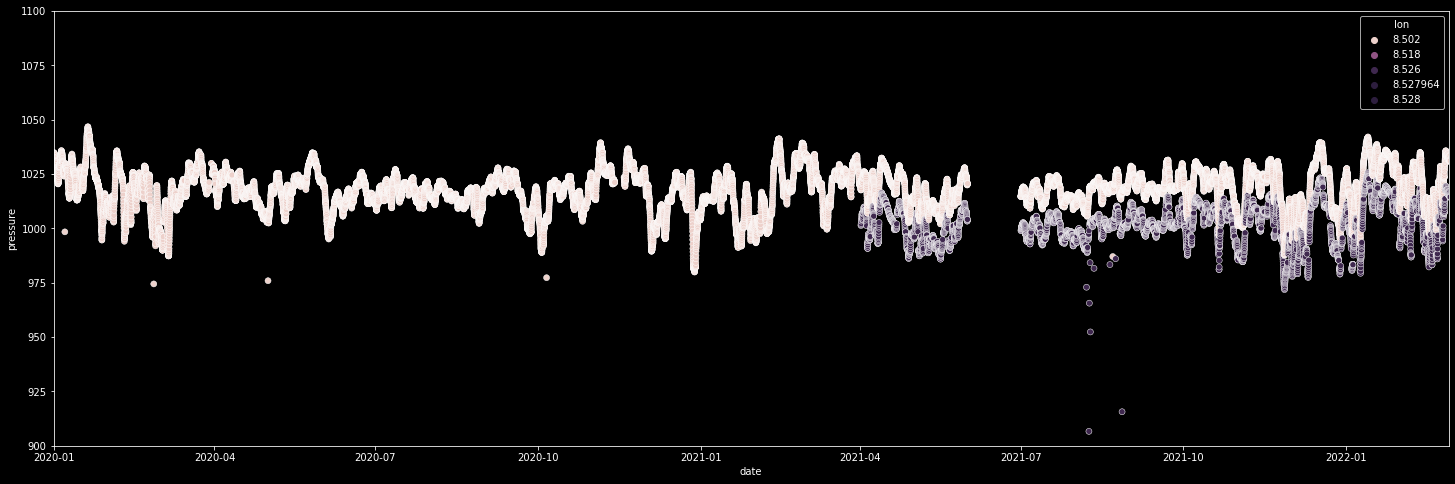

In [40]:
# plot pressure of sensors around unusual high value 50.138 | 8.502
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2022-02-28')
plt.figure(figsize=(25, 8))

sns.scatterplot(data=df_sc.query("50.118<lat<50.158 and 8.472<lon<8.532"), x='timestamp', y='pressure', hue='lon')
plt.xlabel('date')
plt.ylim(900,1100)
plt.xlim(start, end)

(18275.0, 18281.0)

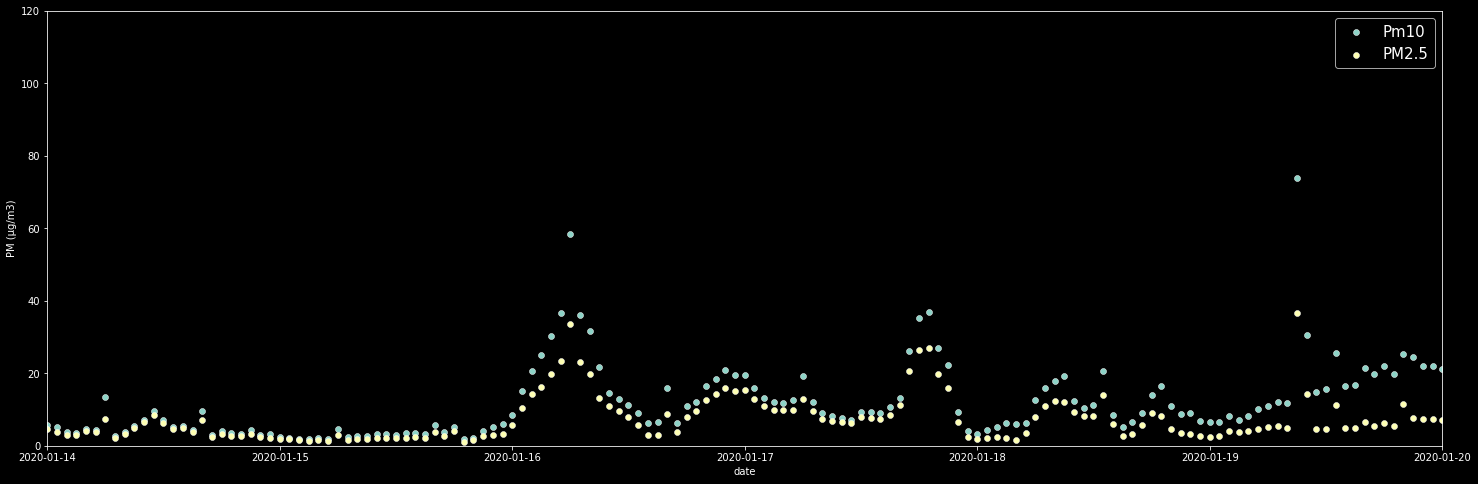

In [41]:
# plot PM for one sensor
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='PM10')
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='PM2p5')
plt.legend(['Pm10', 'PM2.5'], fontsize=15)
plt.ylabel('PM (µg/m3)')
plt.xlabel('date')
plt.ylim(0,120)
plt.xlim(pd.to_datetime('2020-01-14'), pd.to_datetime('2020-01-20'))
#plt.xlim(18250,19080)


(18262.0, 18292.0)

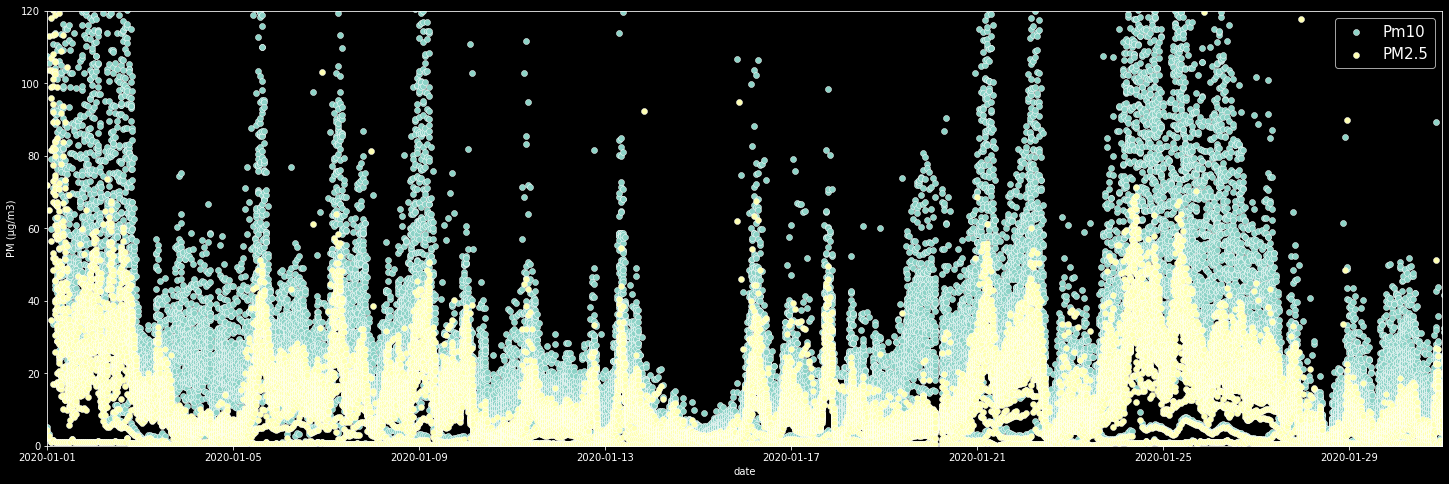

In [14]:
# plot PM for all sensors in Bremen
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc.query("city=='Bremen'"), x='timestamp', y='PM10')
sns.scatterplot(data=df_sc.query("city=='Bremen'"), x='timestamp', y='PM2p5')
plt.legend(['Pm10', 'PM2.5'], fontsize=15)
plt.ylabel('PM (µg/m3)')
plt.xlabel('date')
plt.ylim(0,120)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-01-31'))
#plt.xlim(18250,19080)

<AxesSubplot:xlabel='PM2p5', ylabel='PM10'>

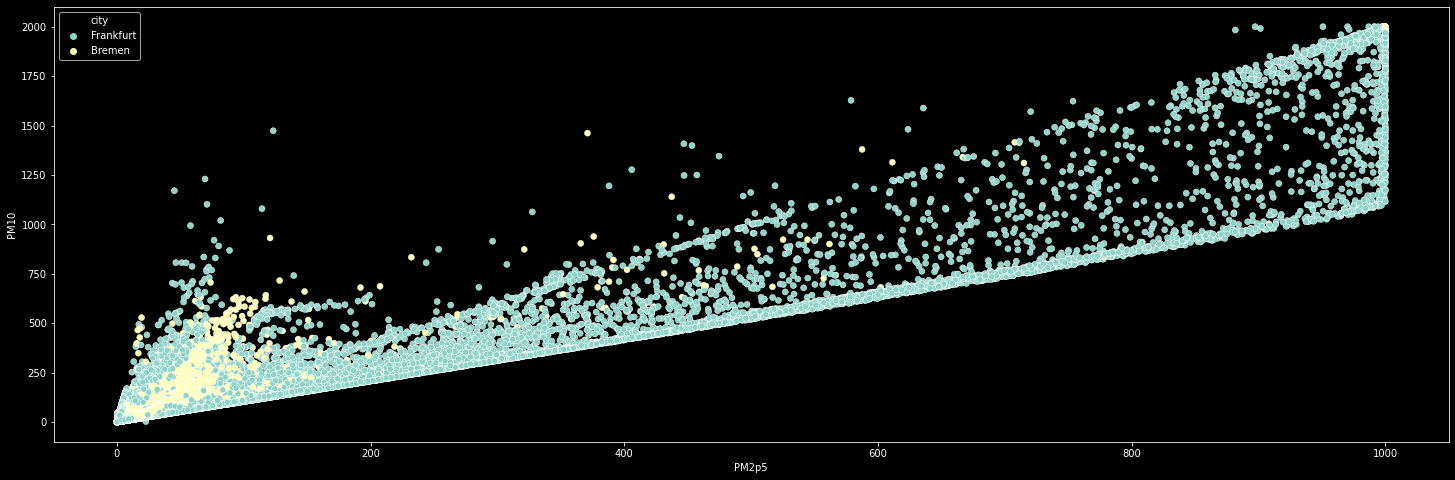

In [76]:

color = ['red', 'blue']
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc, x='PM2p5', y='PM10', hue='city', c=color)
#plt.legend(['Pm10', 'PM2.5'], fontsize=15)
#plt.ylabel('PM (µg/m3)')
#plt.xlabel('date')
#plt.ylim(0,120)
#plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-01-31'))
#plt.xlim(18250,19080)

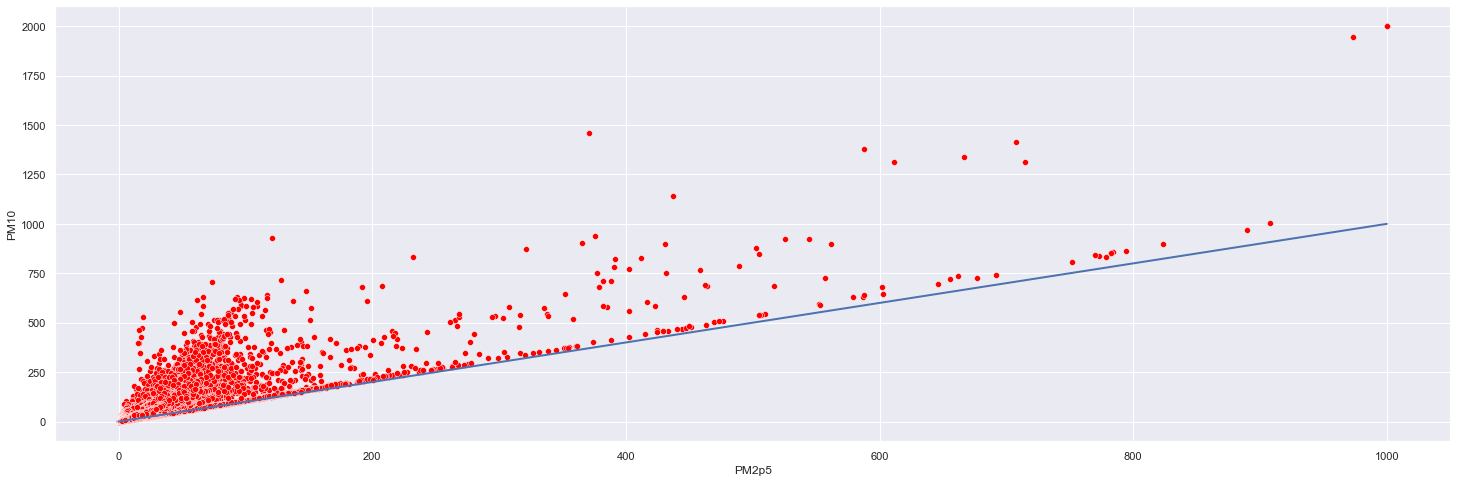

In [ ]:
color = ['red']
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc.query("city=='Bremen'"), x='PM2p5', y='PM10', c=color)
plt.plot([0, 1000], [0, 1000], linewidth=2)

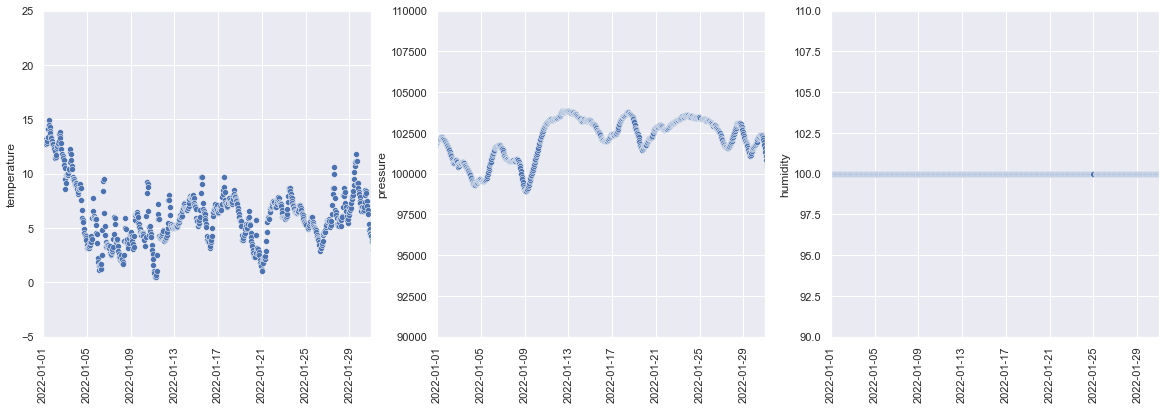

In [ ]:
start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2022-01-31')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='temperature')
plt.xlim(start, end)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylim(-5,25)

plt.subplot(1,3,2)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='pressure')
plt.xlim(start, end)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylim(90000,110000)

plt.subplot(1,3,3)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='humidity')
plt.xlim(start, end)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylim(90,110)

plt.show()

#plt.legend(['temperature', 'humidity'], fontsize=15)
#plt.ylabel('PM (µg/m3)')
#plt.xlabel('date')
#plt.ylim(0,120)

#plt.xlim(18250,19080)

<AxesSubplot:>

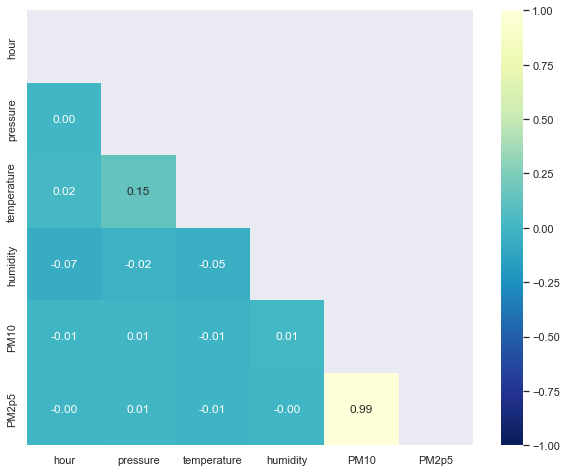

In [ ]:
# correlation map
columns_plot = ['hour', 'pressure', 'temperature', 'humidity', 'PM10', 'PM2p5', 'city']
corr_mtrx_sc = df_sc[columns_plot].corr()
plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_mtrx_sc, dtype=bool))
sns.heatmap(corr_mtrx_sc, annot=True, cmap="YlGnBu_r", mask=mask, vmax=1, vmin=-1,fmt='.2f')

In [ ]:
df_sc.head()

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
0,0,2020-01-01,50.042000,8.436000,2020-01-01,212.110833,140.574167,24.278724,16.827501,NaN,2.70000,96.000000,NaN,NaN,NaN,Frankfurt
68,0,2020-01-01,53.068000,8.870000,2020-01-01,1999.900000,999.900000,0.000000,0.000000,103336.916667,1.71875,99.940417,9.744192,0.114296,0.206345,Bremen
67,0,2020-01-01,53.064000,8.798000,2020-01-01,786.260400,488.984400,295.924349,195.033055,NaN,0.24800,99.900000,NaN,0.214321,0.000000,Bremen
66,0,2020-01-01,53.062000,8.806000,2020-01-01,281.866667,148.982083,145.758391,104.458442,NaN,NaN,NaN,NaN,NaN,NaN,Bremen
65,0,2020-01-01,53.058534,8.763459,2020-01-01,766.882000,458.774000,209.349664,137.049124,NaN,0.02800,92.824000,NaN,0.124231,0.077889,Bremen


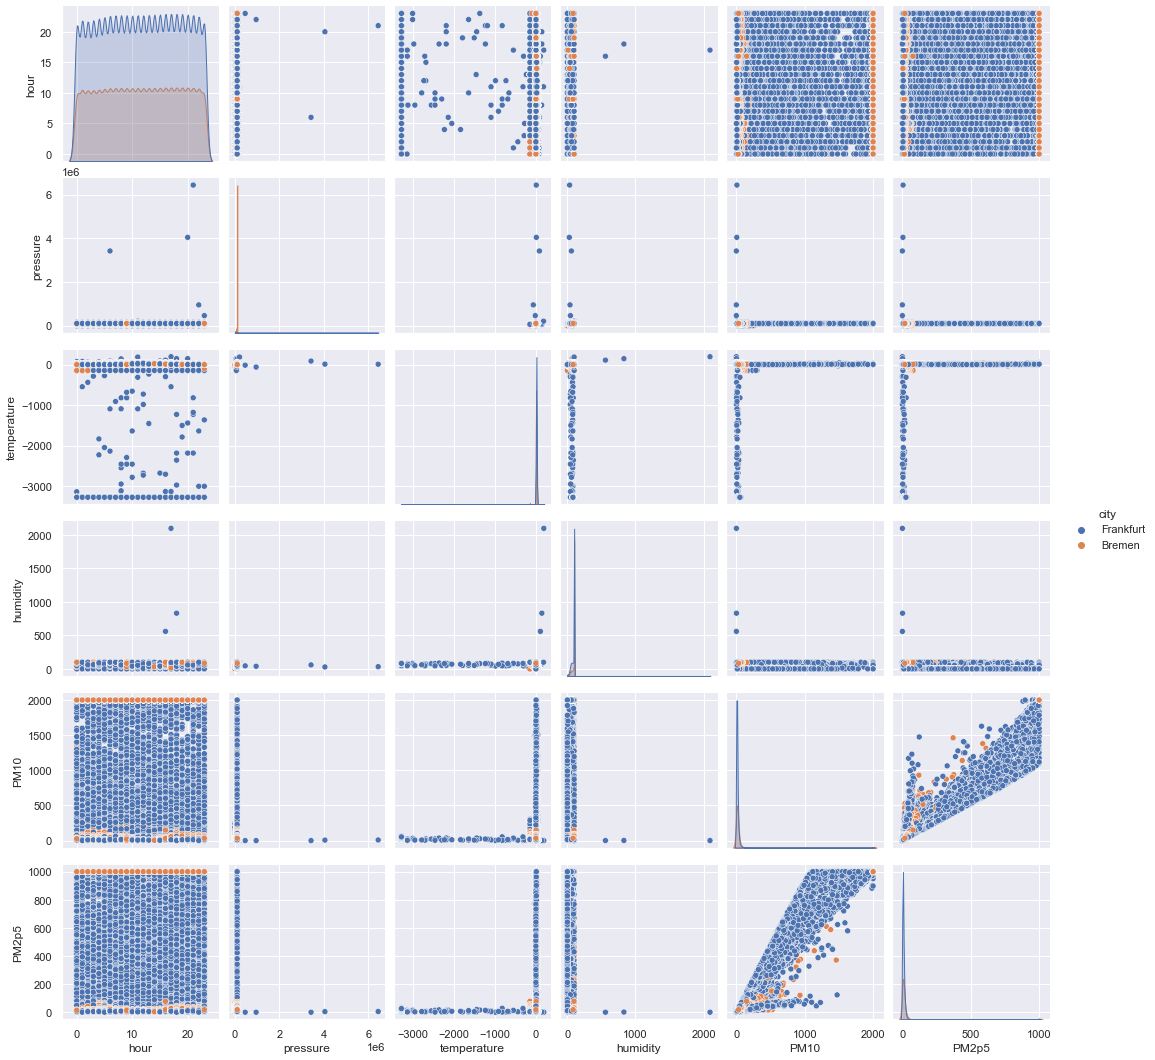

In [ ]:
#pairplotting the features based on city
sns.pairplot(data=df_sc[columns_plot], hue='city');

In [16]:
# European Air Quality Index https://www.eea.europa.eu/themes/air/air-quality-index
def pm2p5_bins(pm):
    bins = {
        '1-good': [0,10],                    # good
        '2-fair': [10,20],                   # fair
        '3-moderate': [20,25],                   # moderate
        '4-poor': [25,50],                   # poor
        '5-very poor': [50,75],                   # very poor
        '6-extremely poor': [75,800],                  # extremely poor
        '7-undefined': [800,2000]                 # undefined
    }
    for k,v in bins.items():
        if v[0] <= pm < v[1]:
            return k

def pm10_bins(pm):
    bins = {
        '1-good': [0,20],                    # good
        '2-fair': [20,40],                   # fair
        '3-moderate': [40,50],                   # moderate
        '4-poor': [50,100],                   # poor
        '5-very poor': [100,150],                   # very poor
        '6-extremely poor': [150,1200],                  # extremely poor
        '7-undefined': [1200,2000]                 # undefined
    }
    for k,v in bins.items():
        if v[0] <= pm < v[1]:
            return k
        
df_sc["PM2p5_quality"] = df_sc["PM2p5"].apply(pm2p5_bins)
df_sc["PM10_quality"] = df_sc["PM10"].apply(pm10_bins)

In [74]:
pm2p5_quality_count = pd.DataFrame(df_sc['PM2p5_quality'].value_counts()).reset_index()
pm10_quality_count = pd.DataFrame(df_sc['PM10_quality'].value_counts()).reset_index()

pm10_quality_count.columns = ['quality', 'PM10_count']
pm2p5_quality_count.columns = ['quality', 'PM2p5_count']

quality_absolute = pm2p5_quality_count.merge(pm10_quality_count, on='quality').sort_values('quality')
quality_absolute

,quality,PM2p5_count,PM10_count
0,1-good,1445743,1517317
1,2-fair,278159,232187
3,3-moderate,53785,37814
2,4-poor,65925,52013
6,5-very poor,6057,9799
5,6-extremely poor,10134,10951
4,7-undefined,12602,12327


<AxesSubplot:xlabel='PM2p5_quality', ylabel='Count'>

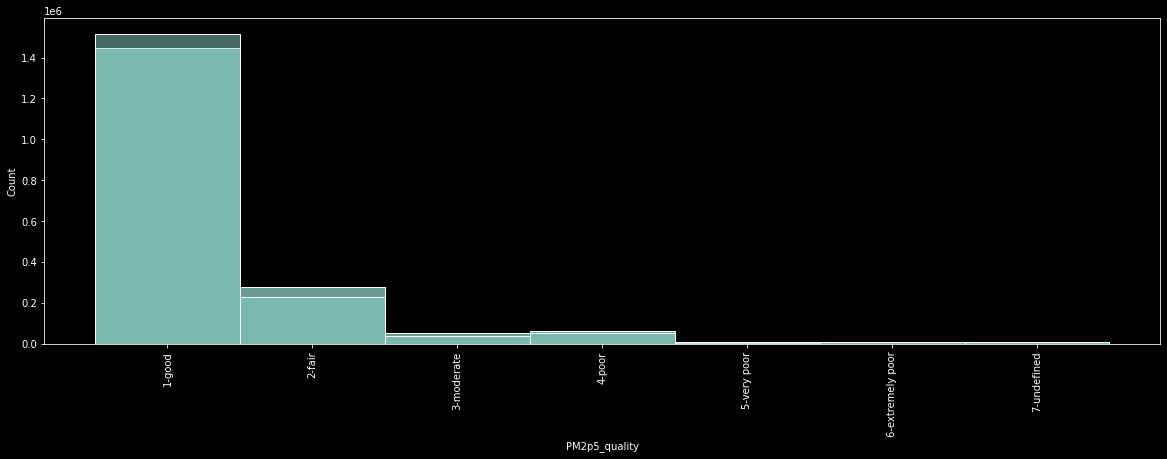

In [63]:
plt.figure(figsize=(20,6))

sns.histplot(data=df_sc.sort_values('PM2p5_quality'), x='PM2p5_quality')
plt.xticks(rotation=90);

sns.histplot(data=df_sc.sort_values('PM10_quality'), x='PM10_quality', alpha=0.5)


In [75]:
# calculate percentages 
percentage_PM2p5 = (pd.crosstab(index=[0],
                             columns=df_sc['PM2p5_quality'],
                             normalize="index") * 100).round(2).iloc[0,:].reset_index()
percentage_PM2p5.columns = ['quality', 'PM2p5']
#display(percentage_PM2p5)

percentage_PM10 = (pd.crosstab(index=[0],
                             columns=df_sc['PM10_quality'],
                             normalize="index") * 100).round(2).iloc[0,:].reset_index()
percentage_PM10.columns = ['quality', 'PM10']                             
#display(percentage_PM2p5)

quality_percentage = percentage_PM2p5.merge(percentage_PM10, on='quality')
quality_percentage

,quality,PM2p5,PM10
0,1-good,77.21,81.04
1,2-fair,14.86,12.40
2,3-moderate,2.87,2.02
3,4-poor,3.52,2.78
4,5-very poor,0.32,0.52
5,6-extremely poor,0.54,0.58
6,7-undefined,0.67,0.66


Text(0.5, 0, 'air quality')

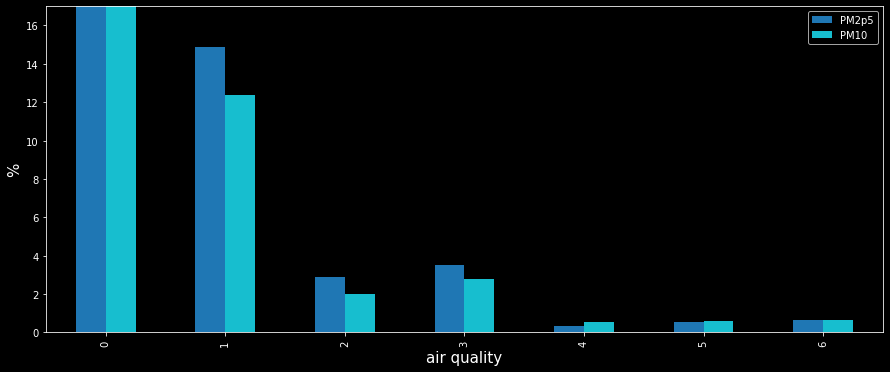

In [22]:
#sns.barplot(data=cross_tab_prop_PM10, y='PM10_count')
#sns.barplot(data=cross_tab_prop_PM2p5, y='PM2p5_count')
quality_percentage.plot(kind='bar', 
                    stacked=False, 
                    colormap='tab10', # 'tab10' 'Set1' 'Dark2'
                    figsize=(15, 6))
plt.ylim(0,17)
plt.ylabel('%', fontsize=15)
plt.xlabel('air quality', fontsize=15)

Predicting particulate matter pollution in Germany to enable officials  to take reasonable measures based
Enabling German officials of taking reasonable measures against air pollution by means of predictive time series analysis.